<a href="https://colab.research.google.com/github/MariaMalchenko/KSVD/blob/main/Malchenko_KSVD4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Мальченко була присутня на парі**

In [4]:
uploaded = files.upload()

Saving Museum_Visitors.csv to Museum_Visitors.csv


In [5]:
df = pd.read_csv('Museum_Visitors.csv')
df

,Month,America Tropical Interpretive Center,Avila Adobe,Chinese American Museum,Gateway to Nature Center,Firehouse Museum,Hellman Quon,IAMLA,Pico House,Visitor Center/ El Tranquilo Gallery,Museum of Social Justice,Biscailuz Gallery/ PK Outdoor Exhibit
0,01/01/2014 12:00:00 AM,6602,24778,1581,NaN,4486,0.0,NaN,2204.0,2961.0,NaN,NaN
1,02/01/2014 12:00:00 AM,5029,18976,1785,NaN,4172,0.0,NaN,1330.0,2276.0,NaN,NaN
2,03/01/2014 12:00:00 AM,8129,25231,3229,NaN,7082,70.0,NaN,4320.0,3116.0,NaN,NaN
3,04/01/2014 12:00:00 AM,2824,26989,2129,NaN,6756,250.0,NaN,3277.0,2808.0,NaN,NaN
4,05/01/2014 12:00:00 AM,10694,36883,3676,NaN,10858,135.0,NaN,4122.0,3987.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
80,09/01/2020 12:00:00 AM,0,0,0,0.0,0,NaN,0.0,0.0,NaN,0.0,NaN
81,10/01/2020 12:00:00 AM,0,0,0,0.0,0,NaN,0.0,0.0,NaN,0.0,2533.0
82,11/01/2020 12:00:00 AM,0,0,0,0.0,0,NaN,0.0,0.0,NaN,0.0,3801.0
83,12/01/2020 12:00:00 AM,0,0,0,0.0,0,NaN,0.0,0.0,NaN,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Month                                  85 non-null     object 
 1   America Tropical Interpretive Center   85 non-null     int64  
 2   Avila Adobe                            85 non-null     int64  
 3   Chinese American Museum                85 non-null     int64  
 4   Gateway to Nature Center               32 non-null     float64
 5   Firehouse Museum                       85 non-null     int64  
 6   Hellman Quon                           26 non-null     float64
 7   IAMLA                                  54 non-null     float64
 8   Pico House                             83 non-null     float64
 9   Visitor Center/ El Tranquilo Gallery   45 non-null     float64
 10  Museum of Social Justice               37 non-null     float64
 11  Biscailu

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

,0
Month,0
America Tropical Interpretive Center,0
Avila Adobe,0
Chinese American Museum,0
Gateway to Nature Center,53
Firehouse Museum,0
Hellman Quon,59
IAMLA,31
Pico House,2
Visitor Center/ El Tranquilo Gallery,40


In [9]:
df = df.fillna(df.mean(numeric_only=True), axis =0)

In [10]:
df.isnull().sum()

,0
Month,0
America Tropical Interpretive Center,0
Avila Adobe,0
Chinese American Museum,0
Gateway to Nature Center,0
Firehouse Museum,0
Hellman Quon,0
IAMLA,0
Pico House,0
Visitor Center/ El Tranquilo Gallery,0


In [11]:
df.head()

,Month,America Tropical Interpretive Center,Avila Adobe,Chinese American Museum,Gateway to Nature Center,Firehouse Museum,Hellman Quon,IAMLA,Pico House,Visitor Center/ El Tranquilo Gallery,Museum of Social Justice,Biscailuz Gallery/ PK Outdoor Exhibit
0,01/01/2014 12:00:00 AM,6602,24778,1581,1247.375,4486,0.0,882.611111,2204.0,2961.0,2125.972973,1088.615385
1,02/01/2014 12:00:00 AM,5029,18976,1785,1247.375,4172,0.0,882.611111,1330.0,2276.0,2125.972973,1088.615385
2,03/01/2014 12:00:00 AM,8129,25231,3229,1247.375,7082,70.0,882.611111,4320.0,3116.0,2125.972973,1088.615385
3,04/01/2014 12:00:00 AM,2824,26989,2129,1247.375,6756,250.0,882.611111,3277.0,2808.0,2125.972973,1088.615385
4,05/01/2014 12:00:00 AM,10694,36883,3676,1247.375,10858,135.0,882.611111,4122.0,3987.0,2125.972973,1088.615385


In [12]:
df.describe()

,America Tropical Interpretive Center,Avila Adobe,Chinese American Museum,Gateway to Nature Center,Firehouse Museum,Hellman Quon,IAMLA,Pico House,Visitor Center/ El Tranquilo Gallery,Museum of Social Justice,Biscailuz Gallery/ PK Outdoor Exhibit
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,5637.694118,19904.952941,2359.117647,1247.375000,5286.776471,353.461538,882.611111,1329.710843,2634.800000,2125.972973,1088.615385
std,3277.453044,9495.340548,1360.427221,736.364942,6591.535926,243.882008,402.879854,1810.572631,1487.684023,1279.746780,447.156828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3891.000000,17056.000000,1785.000000,1247.375000,3858.000000,353.461538,863.000000,185.000000,2634.800000,2125.972973,1038.000000
50%,5705.000000,20815.000000,2371.000000,1247.375000,4613.000000,353.461538,882.611111,610.000000,2634.800000,2125.972973,1088.615385
75%,6955.000000,25234.000000,2808.000000,1247.375000,5406.000000,353.461538,1088.000000,1550.000000,2771.000000,2125.972973,1088.615385
max,13490.000000,41242.000000,7702.000000,4227.000000,61192.000000,2000.000000,1883.000000,9312.000000,13750.000000,10740.000000,3801.000000


In [13]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace('__', '_').str.strip()


In [14]:
df['month'] = pd.to_datetime(df['month'], format='%m/%d/%Y %I:%M:%S %p')

df_2018 = df[df['month'].dt.year == 2018]

min_visitors = df_2018.iloc[:, 1:].min()
max_visitors = df_2018.iloc[:, 1:].max()
result = pd.DataFrame({'min': min_visitors, 'max': max_visitors})

result


,min,max
america_tropical_interpretive_center,3180.000000,5837.000000
avila_adobe,14718.000000,25173.000000
chinese_american_museum,2078.000000,4960.000000
gateway_to_nature_center,1247.375000,1247.375000
firehouse_museum,3306.000000,8013.000000
hellman_quon,353.461538,353.461538
iamla,965.000000,1601.000000
pico_house_,185.000000,2140.000000
visitor_center_el_tranquilo_gallery,2634.800000,2634.800000
museum_of_social_justice,2332.000000,3686.000000


In [15]:
average_visitors = df.iloc[:, 1:].mean()
average_visitors

,0
america_tropical_interpretive_center,5637.694118
avila_adobe,19904.952941
chinese_american_museum,2359.117647
gateway_to_nature_center,1247.375000
firehouse_museum,5286.776471
hellman_quon,353.461538
iamla,882.611111
pico_house_,1329.710843
visitor_center_el_tranquilo_gallery,2634.800000
museum_of_social_justice,2125.972973


In [16]:
df_2015 = df[df['month'].dt.year == 2015]

# Додаємо новий стовпець із загальною кількістю відвідувачів по всіх музеях
df_2015['total_visitors'] = df_2015.iloc[:, 1:].sum(axis=1)

# Знаходимо рядок з мінімальною та максимальною кількістю
min_row = df_2015.loc[df_2015['total_visitors'].idxmin()]
max_row = df_2015.loc[df_2015['total_visitors'].idxmax()]

# Виводимо назви місяців
min_month = min_row['month'].strftime('%B')
max_month = max_row['month'].strftime('%B')

print(f'найнижча в {min_month}')
print(f'найбільша в {max_month}')

найнижча в February
найбільша в May


<ipython-input-16-a38a25ed138d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['total_visitors'] = df_2015.iloc[:, 1:].sum(axis=1)


In [17]:
df_2018 = df[df['month'].dt.year == 2018]

# Витягаємо номер місяця
df_2018['month_num'] = df_2018['month'].dt.month

# Літні місяці: червень (6), липень (7), серпень (8)
summer = df_2018[df_2018['month_num'].isin([6, 7, 8])]['avila_adobe'].sum()

# Зимові місяці: грудень (12), січень (1), лютий (2)
# Потрібно об'єднати грудень 2017 та січень-лютий 2018 — але якщо лиш 2018, то:
winter = df_2018[df_2018['month_num'].isin([1, 2, 12])]['avila_adobe'].sum()

print(f" Літом відвідали: {summer} людей")
print(f" Зимою відвідали: {winter} людей")


 Літом відвідали: 66122 людей
 Зимою відвідали: 48705 людей


<ipython-input-17-f1755d3aa0a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['month_num'] = df_2018['month'].dt.month


In [18]:
df.corr()

,month,america_tropical_interpretive_center,avila_adobe,chinese_american_museum,gateway_to_nature_center,firehouse_museum,hellman_quon,iamla,pico_house_,visitor_center_el_tranquilo_gallery,museum_of_social_justice,biscailuz_gallery_pk_outdoor_exhibit
month,1.000000,-0.781557,-0.738084,-0.315742,-3.319433e-01,-0.371774,2.091013e-02,-2.161637e-01,-0.475915,-1.395551e-02,-1.504719e-01,7.475819e-02
america_tropical_interpretive_center,-0.781557,1.000000,0.854877,0.540915,4.754155e-01,0.279719,-3.002331e-02,4.267715e-01,0.495783,1.045570e-01,2.860157e-01,-5.913842e-02
avila_adobe,-0.738084,0.854877,1.000000,0.591643,5.994894e-01,0.415099,2.828129e-02,6.129649e-01,0.440687,7.427750e-02,3.818376e-01,-1.054805e-01
chinese_american_museum,-0.315742,0.540915,0.591643,1.000000,5.956485e-01,0.164809,2.658100e-02,6.021707e-01,0.150424,1.408652e-01,4.223186e-01,-4.708062e-02
gateway_to_nature_center,-0.331943,0.475416,0.599489,0.595648,1.000000e+00,0.194937,3.850117e-17,5.707920e-01,0.055837,-2.753450e-02,3.761572e-01,-1.150013e-01
firehouse_museum,-0.371774,0.279719,0.415099,0.164809,1.949374e-01,1.000000,3.697758e-01,2.161862e-01,0.153608,-1.203960e-01,1.370450e-01,-2.544659e-02
hellman_quon,0.020910,-0.030023,0.028281,0.026581,3.850117e-17,0.369776,1.000000e+00,1.770881e-17,0.171372,1.156224e-01,1.269785e-17,-9.213333e-18
iamla,-0.216164,0.426772,0.612965,0.602171,5.707920e-01,0.216186,1.770881e-17,1.000000e+00,0.117421,2.140129e-02,6.777008e-01,-4.802304e-02
pico_house_,-0.475915,0.495783,0.440687,0.150424,5.583673e-02,0.153608,1.713717e-01,1.174211e-01,1.000000,4.509112e-01,9.413240e-02,-4.705054e-02
visitor_center_el_tranquilo_gallery,-0.013956,0.104557,0.074277,0.140865,-2.753450e-02,-0.120396,1.156224e-01,2.140129e-02,0.450911,1.000000e+00,-3.330576e-17,4.536785e-02


<function matplotlib.pyplot.show(close=None, block=None)>

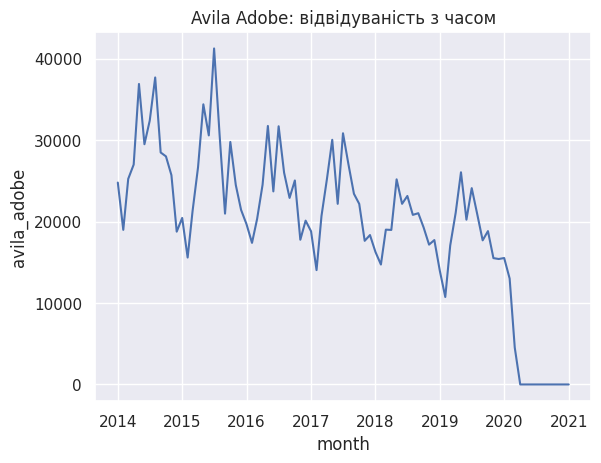

In [19]:
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="month", y="avila_adobe")
plt.title("Avila Adobe: відвідуваність з часом")
plt.show

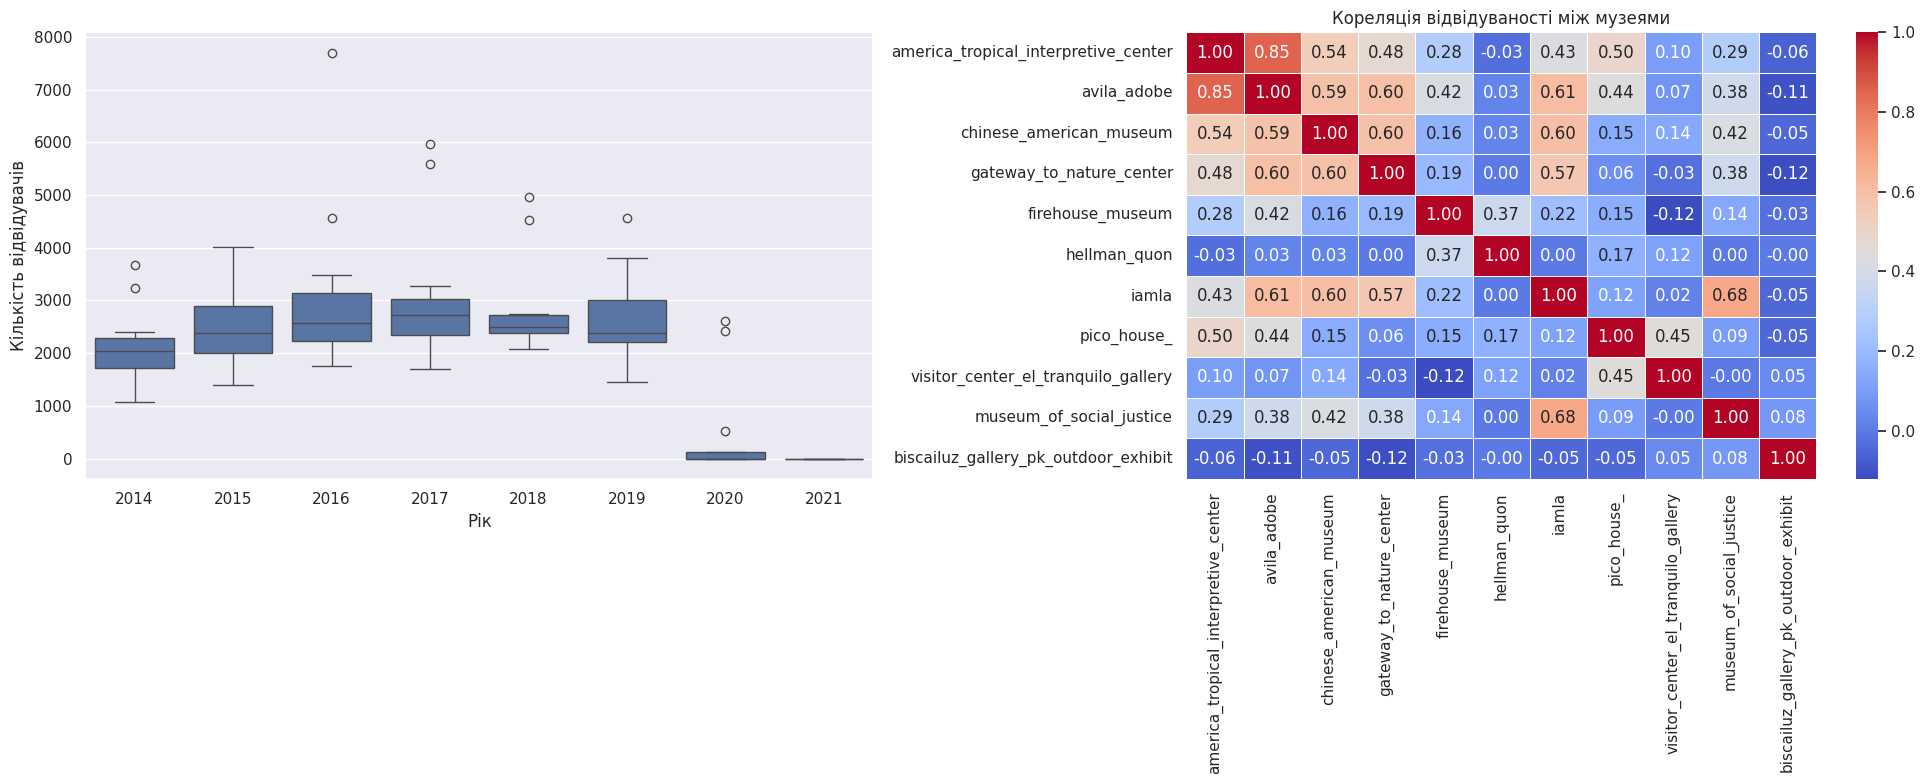

In [27]:
df['month'] = pd.to_datetime(df['month'])
df['year'] = df['month'].dt.year

museum_df = df.select_dtypes(include=[np.number]).drop(columns=['year'], errors='ignore')
corr = museum_df.corr()

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.boxplot(data=df, x='year', y='chinese_american_museum', ax=axes[0])
axes[0].set_xlabel('Рік')
axes[0].set_ylabel('Кількість відвідувачів')

sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, ax=axes[1])
axes[1].set_title('Кореляція відвідуваності між музеями')
plt.tight_layout()
plt.show()

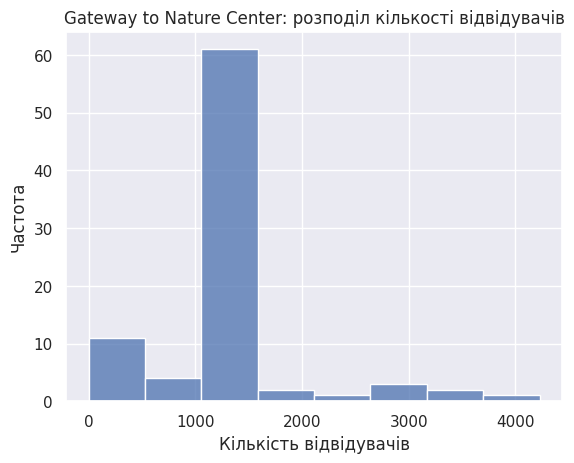

In [31]:
sns.set_theme(style="darkgrid")

sns.histplot(data=df, x='gateway_to_nature_center')
plt.title('Gateway to Nature Center: розподіл кількості відвідувачів')
plt.xlabel('Кількість відвідувачів')
plt.ylabel('Частота')
plt.show()

<ipython-input-34-93970361561b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_visits, x='Середня кількість відвідувачів', y='Музей', palette='viridis')


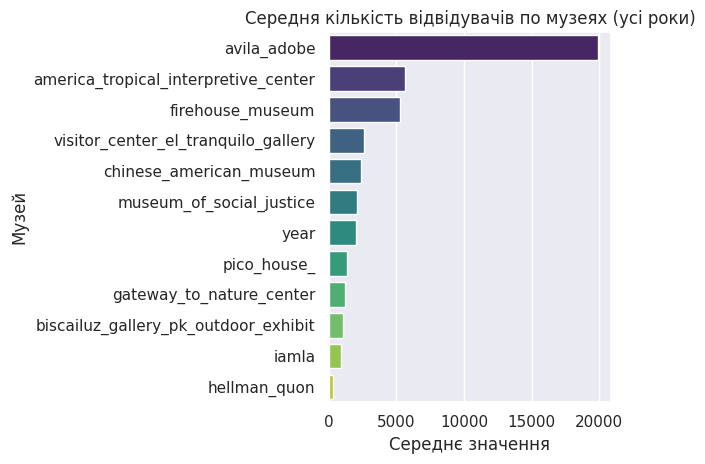

In [34]:
sns.set_theme(style="darkgrid")
mean_visits = museum_df.mean().sort_values(ascending=False).reset_index()
mean_visits.columns = ['Музей', 'Середня кількість відвідувачів']

sns.barplot(data=mean_visits, x='Середня кількість відвідувачів', y='Музей', palette='viridis')
plt.title('Середня кількість відвідувачів по музеях (усі роки)')
plt.xlabel('Середнє значення')
plt.ylabel('Музей')
plt.tight_layout()
plt.show()